<a href="https://colab.research.google.com/github/greenixproject/machine-learning/blob/main/Vehicle_Greenix/vehicle_emission_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Emisi karbon banyak terutama dari aktivitas sehari-hari salah satunya adalah dari konsumsi makanan
2. Awareness masyarakat masih kurang tentang karbon yang dapat dihasilkan
3. Dari permasalahan tersebut, pada project kali ini kami akan membuat prediksi emisi karbon yang dihasilkan dari konsumsi makanan
4. Data yang kami gunakan diambil dan dikumpulkan dari survei kepada responden, jurnal dan website lainnya

In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Keterangan kolom:
- nomer: nomer urut responden
- nama: nama responden
- email: email responden
- tfep_kgco2e: total emisi dari seluruh makanan meliputi jagung, beras, singkong, kacangan-kacangan, daging unggas, minyak kelapa sawit 
- num_people_jagung: jumlah orang yang ikut makan jagung
- consumption_jagung: jumlah konsumsi jagung (kg)
- factor_jagung: nilai emisi dari jagung (kgCO2e)
- emission_jagung: total emisi per orang yang dihasilkan dari mengkonsumsi jagung (kg CO2e)
- num_people_beras: jumlah orang yang ikut makan beras
- consumption_beras: jumlah konsumsi beras (kg)
- factor_beras: nilai emisi dari beras (kgCO2e)
- emission_beras: total emisi per orang yang dihasilkan dari mengkonsumsi beras (kg CO2e)
- num_people_singkong: jumlah orang yang ikut makan singkong
- consumption_singkong: jumlah konsumsi singkong (kg)
- factor_singkong: nilai emisi dari singkong (kgCO2e)
- emission_singkong: total emisi per orang yang dihasilkan dari mengkonsumsi singkong (kg CO2e)
- num_people_kacang_kacangan: jumlah orang yang ikut makan kacang_kacangan
- consumption_kacang_kacangan: jumlah konsumsi kacang_kacangan (kg)
- factor_kacang_kacangan: nilai emisi dari kacang_kacangan (kgCO2e)
- emission_kacang_kacangan: total emisi per orang yang dihasilkan dari mengkonsumsi kacang_kacangan (kg CO2e)
- num_people_daging_unggas: jumlah orang yang ikut makan daging_unggas
- consumption_daging_unggas: jumlah konsumsi daging_unggas (kg)
- factor_daging_unggas: nilai emisi dari daging_unggas (kgCO2e)
- emission_daging_unggas: total emisi per orang yang dihasilkan dari mengkonsumsi daging_unggas (kg CO2e)
- num_people_minyak_kelapa_sawit: jumlah orang yang ikut makan minyak_kelapa_sawit
- consumption_minyak_kelapa_sawit: jumlah konsumsi minyak_kelapa_sawit (kg)
- factor_minyak_kelapa_sawit: nilai emisi dari minyak_kelapa_sawit (kgCO2e)
- emission_minyak_kelapa_sawit: total emisi per orang yang dihasilkan dari mengkonsumsi minyak_kelapa_sawit (kg CO2e)

In [ ]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [ ]:
# Menentukan path file CSV yang telah diunggah
file_path = '/content/drive/MyDrive/Greenix/Vehicle Dataset - vehicle_car (1).csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama DataFrame
print(df.head())


   no         nama                       email car_class fuel_type  \
0   1      Nur ***  *******arizkiyah@gmail.com   Compact    Diesel   
1   2  Syakira ***     *******akiras@gmail.com   Compact    Diesel   
2   3  Nisrinaa **        *******alm@gmail.com   Compact    Diesel   
3   4     Ghozi **        *******ya2@gmail.com   Compact    Diesel   
4   5      Sarah *      *******lla49@gmail.com   Compact    Diesel   

   fuel_comsumption(km/L)  emissions_factor  distanced  emissions  
0                    5.23           0.00282         13     0.0514  
1                    5.23           0.00282         44     0.1388  
2                    5.23           0.00282         21     0.0740  
3                    5.23           0.00282         57     0.1755  
4                    5.23           0.00282         85     0.2544  


## DATA CLEANING

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [ ]:
df = df.drop(['no',	'nama',	'email'], axis=1)

## Data Preprocessing

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_comsumption(km/L)',	'emissions_factor',	'distanced',	'emissions']

In [ ]:
# Mendeteksi outliers dengan Z-score
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  
# Menghilangkan data dengan Z-score lebih dari 3
data = df[filtered_entries]

## Eksplorasi Data

In [ ]:
df.head()

,car_class,fuel_type,fuel_comsumption(km/L),emissions_factor,distanced,emissions
0,Compact,Diesel,5.23,0.00282,13,0.0514
1,Compact,Diesel,5.23,0.00282,44,0.1388
2,Compact,Diesel,5.23,0.00282,21,0.0740
3,Compact,Diesel,5.23,0.00282,57,0.1755
4,Compact,Diesel,5.23,0.00282,85,0.2544


In [ ]:
# Melihat jumlah baris dan kolom
df.shape

(649, 6)

In [ ]:
# Melihat info statistik data
df.describe()

,fuel_comsumption(km/L),emissions_factor,distanced,emissions
count,649.000000,649.000000,649.000000,649.000000
mean,7.049661,0.008357,51.483821,0.490212
std,1.904375,0.003063,28.933035,0.318264
min,4.220000,0.002820,1.000000,0.020400
25%,5.230000,0.006410,27.000000,0.225800
50%,6.830000,0.007910,52.000000,0.424500
75%,8.420000,0.011890,77.000000,0.716900
max,10.010000,0.011910,100.000000,1.310200


In [ ]:
# Melihat tipe data
print(df.dtypes)

car_class                  object
fuel_type                  object
fuel_comsumption(km/L)    float64
emissions_factor          float64
distanced                   int64
emissions                 float64
dtype: object


In [ ]:
# melihat missing values
df[df==0].count()

car_class                 0
fuel_type                 0
fuel_comsumption(km/L)    0
emissions_factor          0
distanced                 0
emissions                 0
dtype: int64

Pada tfep_kgco2e tidak terdapat user yang memiliki nilai 0 yang berarti seluruh responden melakukan konsumsi dari pilihan makanan sehingga seluruh responden menghasilkan emisi.
Pada makanan jagung terdapat 2185 baris yang memiliki nilai 0, sedangkan pada makanan beras terdapat 55 baris yang memiliki nilai 0, pada makanan singkong terdapat 2188 baris yang memiliki nilai 0, kemudian pada makanan kacang-kacangan terdapat 2187 baris yang memiliki nilai 0, pada makanan daging unggas terdapat 2178 baris yang memiliki nilai 0 dan terakhir pada makanan minyak kelapa sawit terdapat 2219 baris yang memiliki nilai 0.

Seluruh baris tersebut tidak di drop karena responden bisa jadi tidak mengkonsumsi makanan tersebut pada hari tersebut.

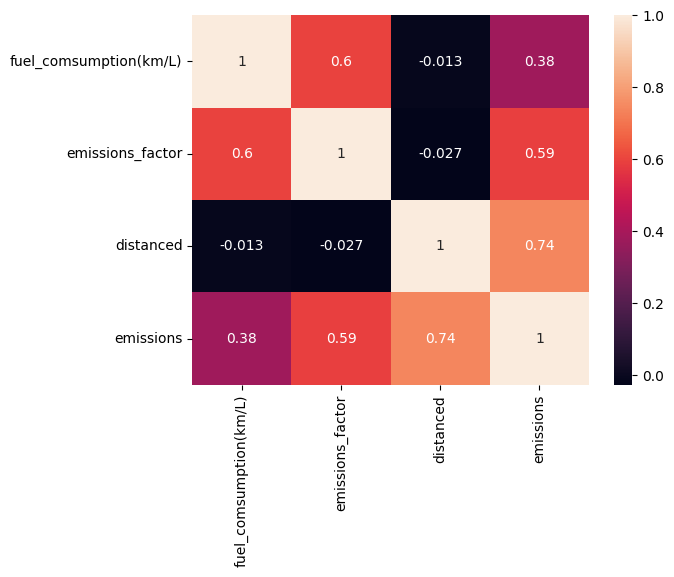

In [ ]:
# Subset kolom emisi
emission_variable_columns = ['fuel_comsumption(km/L)',	'emissions_factor',	'distanced']

# Melihat korelasi antarkolom dengan kolom tfep_kgco2e
sns.heatmap(df[emission_variable_columns + ['emissions']].corr(), annot=True)
plt.show()

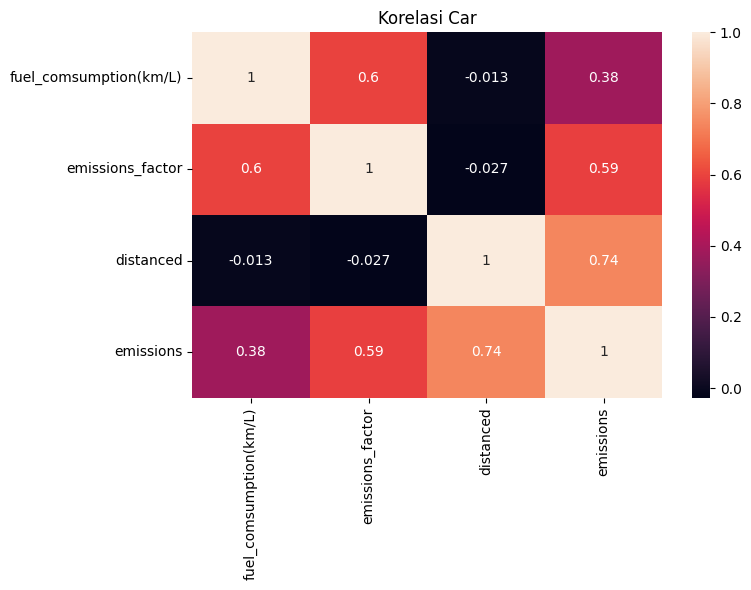

In [ ]:
car_emissions_columns = {
    'Car': ['fuel_comsumption(km/L)',	'emissions_factor',	'distanced', 'emissions'],
}

# Membuat subplots untuk masing-masing mobil
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Meloopi setiap mobil
for car, columns in car_emissions_columns.items():
    # Subset kolom untuk mobil tertentu
    subset = df[columns].corr()
    
    # Heatmap untuk mobil tertentu
    sns.heatmap(subset, annot=True, ax=axes)
    axes.set_title(f'Korelasi {car.capitalize()}')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_comsumption(km/L)',	'emissions_factor',	'distanced',	'emissions']

### Feature Selection
Akan dilakukan pemisahan fitur dan target untuk setiap makanan. 
Yang menjadi fitur adalah 'num_people' dan 'consumption', sedangkan untuk target kami adalah 'emission'.

In [ ]:
# Memisahkan fitur dan target untuk car
car_features = df[['fuel_comsumption(km/L)',	'emissions_factor',	'distanced']]
car_target = df['emissions']

### Splitting Data
Data yang digunakan untuk training sebanyak 80% dan testing sebanyak 20%

In [ ]:
# Membagi data car menjadi set pelatihan dan pengujian
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_features, car_target, test_size=0.2, random_state=42)

### Modelling 
Melatih model dengan regresi linier untuk setiap makanan

In [ ]:
# Melatih model regresi linier untuk beras
car_model = LinearRegression()
car_model.fit(car_X_train, car_y_train)

# Melakukan prediksi emisi karbon dari konsumsi beras
car_y_pred = car_model.predict(car_X_test)

# Menghitung evaluasi performa model untuk beras
car_mse = mean_squared_error(car_y_test, car_y_pred)
car_r2 = r2_score(car_y_test, car_y_pred)

Untuk evaluasi performa model ini menggunakan MSE dibanding MAE karen beberapa pertimbangan-pertimbangan berikut:
1. Dalam perhitungan MSE, bobot yang diberikan pada kesalahan yang besar lebih tinggi karena selisih antara nilai prediksi dan nilai sebenarnya di kuadratkan. Hal ini memungkinkan pengidentifikasian dan penekanan pada outlier atau kesalahan prediksi yang signifikan dalam model. Saya mengutamakan identifikasi kesalahan prediksi yang penting dan membutuhkan perhatian lebih.
2. Selain itu saya juga ingin mengukur kesalahan prediksi dalam skala yang sama dengan variabel target, yaitu emisi karbon. MSE memberikan hasil dalam satuan kuadrat (misalnya, kg CO2e^2), yang konsisten dengan skala variabel target. Sehingga saya ingin memastikan bahwa ukuran kesalahan yang saya gunakan sesuai dengan skala yang relevan.
3. MSE memberikan penekanan lebih pada kesalahan yang lebih besar karena mengkuadratkan selisih antara prediksi dan nilai sebenarnya. Sebagai seorang data scientist, saya ingin memastikan bahwa kesalahan prediksi yang signifikan memiliki dampak yang lebih besar pada penilaian performa model.

In [ ]:
# Menampilkan hasil evaluasi performa model
print("Hasil evaluasi performa model untuk car:")
print("MSE:", car_mse)
print("R-squared:", car_r2)

#Hasil evaluasi performa model untuk car:
#MSE: 18.310887105568824
#R-squared: 0.7626739352396132

Hasil evaluasi performa model untuk car:
MSE: 0.006740275480365197
R-squared: 0.925760132998354


# Interpretasi

**Evaluasi performa model untuk beras:**
- MSE (Mean Squared Error): 0.1887 
- R-squared: 0.7383 
- Evaluasi performa model untuk beras menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang cukup tinggi menunjukkan bahwa model regresi linear untuk beras memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 73.83% variasi dalam emisi karbon beras.

**Evaluasi performa model untuk jagung:**
- MSE: 0.0324
- R-squared: 0.8893 
- Evaluasi performa model untuk jagung menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk jagung memiliki tingkat kesalahan yang kecil dan mampu menjelaskan sekitar 88.93% variasi dalam emisi karbon jagung.

**Evaluasi performa model untuk singkong:**
- MSE: 0.0194
- R-squared: 0.9233 
- Evaluasi performa model untuk singkong menunjukkan hasil yang sangat baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk singkong memiliki tingkat kesalahan yang rendah dan mampu menjelaskan sekitar 92.33% variasi dalam emisi karbon singkong.

**Evaluasi performa model untuk kacang-kacangan:**
- MSE: 0.1360
- R-squared: 0.8863 
- Evaluasi performa model untuk kacang-kacangan menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk kacang-kacangan memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 88.63% variasi dalam emisi karbon kacang-kacangan.

**Evaluasi performa model untuk daging unggas:**
- MSE: 3.0359
- R-squared: 0.8655 
- Evaluasi performa model untuk daging unggas menunjukkan hasil yang kurang baik. Nilai MSE yang tinggi menunjukkan tingkat kesalahan yang besar. Namun, nilai R-squared yang tinggi sebesar 0.8655 menunjukkan bahwa sekitar 86.55% variasi dalam emisi karbon daging unggas dapat dijelaskan oleh model.

**Evaluasi performa model untuk minyak kelapa sawit:**
- MSE: 0.9014
- R-squared: 0.853
- Evaluasi performa model untuk minyak kelapa sawit menunjukkan hasil yang cukup baik. Nilai MSE yang rendah dan nilai R-squared yang tinggi menunjukkan bahwa model regresi linear untuk minyak kelapa sawit memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 85.33% variasi dalam emisi karbon minyak kelapa sawit.

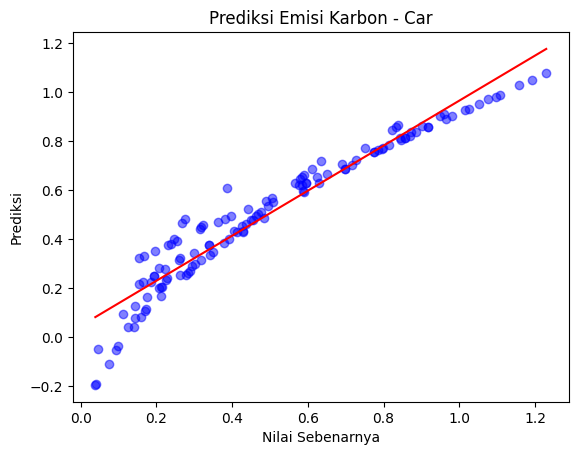

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisasi dan garis regresi untuk beras
plt.scatter(car_y_test, car_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(car_y_test), np.poly1d(np.polyfit(car_y_test, car_y_pred, 1))(np.unique(car_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Car')
plt.show()


# Membuat model Deep Learning. 
- model neural network dengan 3 layer untuk memprediksi emisi karbon dari konsumsi masing-masing makanan.
- menggunakan fungsi aktivasi relu pada layer pertama dan kedua, dan tidak menggunakan fungsi aktivasi pada layer output karena masalah regresi.
- Data diskalakan agar model dapat lebih efisien (menggunakan StandardScaler dari scikit-learn )

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
car_X_train_scaled = scaler.fit_transform(car_X_train)
car_X_test_scaled = scaler.transform(car_X_test)

# Membuat model Sequential untuk beras
car_model_tf = Sequential()
car_model_tf.add(Dense(32, input_dim=car_X_train_scaled.shape[1], activation='relu'))
car_model_tf.add(Dense(16, activation='relu'))
car_model_tf.add(Dense(1))
car_model_tf.compile(loss='mean_squared_error', optimizer='adam')

car_model_tf.fit(car_X_train_scaled, car_y_train, epochs=20, batch_size=64, validation_split=0.2)
car_y_pred_tf = car_model_tf.predict(car_X_test_scaled[:, :3])
car_mse_tf = mean_squared_error(car_y_test, car_y_pred_tf)
car_rmse_tf = np.sqrt(car_mse_tf)
car_r2_tf = r2_score(car_y_test, car_y_pred_tf)

print("Hasil evaluasi performa model TensorFlow untuk Mobil:")
print("MSE:", car_mse_tf)
print("RMSE:", car_rmse_tf)
print("R-squared:", car_r2_tf)

Epoch 1/20
7/7 [==============================] - 0s 21ms/step - loss: 0.1566 - val_loss: 0.0908
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0728 - val_loss: 0.0452
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.0289
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.0213
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0182 - val_loss: 0.0163
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0138 - val_loss: 0.0145
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0132
Epoch 8/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0114
Epoch 9/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0100
Epoch 10/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 11/20
7/7 [=====================

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
car_model_tf.save('/content/gdrive/MyDrive/Greenix/car_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model.
model = load_model('/content/gdrive/MyDrive/Greenix/car_model.h5')

# Convert the model to TFLite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model.
with open('car_model.tflite', 'wb') as f:
    f.write(tflite_model)

car_model_tf.save('/content/gdrive/MyDrive/Greenix/car_model.tflite')

In [ ]:
from tensorflow.keras.models import load_model

# Load model
car_model = load_model('/content/gdrive/MyDrive/Greenix/car_model.h5')

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

# Load the model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Greenix/car_model.h5')

# Define the new data
distance = 100
fuel_consumption = 5

# Scale the new data
new_data = tf.convert_to_tensor([distance, fuel_consumption])
new_data_scaled = scaler.transform(new_data)

# Reshape the new data
new_data_scaled = new_data_scaled.reshape(1, -1)

# Make a prediction
prediction = model.predict(new_data_scaled)

# Print the prediction
print("The predicted fuel consumption is:", prediction[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: ignored